In [42]:
# 결측치 : 다양한 이유로 불완전한 데이터 - 누락 None NaN
import pandas as pd
import numpy as np
np.array([1,2,3]) #==> list 형태로 출력 array([1, 2, 3])
list(np.array([1,2,3])) # ==> [np.int64(1), np.int64(2), np.int64(3)]
np.array([1,2,3]) + np.array([1,2,3]) # ==> 출력 array([2, 4, 6])
np.array([1,2,3])*3 # ==> array([3, 6, 9])
[1,2,3]*3  # ==> [1, 2, 3, 1, 2, 3, 1, 2, 3]
# 결측치 표현 : pd.NA   np.nan
df = pd.DataFrame({
     'A' : [1,2,np.nan, 4], 
     'B' : [5, np.nan, np.nan, 8],
     'C' : [9,10,11,12],
})
print ('=======결측치 확인 (isna)=========')
print (df.isna()) #==>결측치인 값들만 True로 표기됨. 
print ('===========열별 결측치 개수 확인========')
print(df.isna().sum())
print('============info=============')
print(df.info())

=======결측치 확인 (isna)=========
       A      B      C
0  False  False  False
1  False   True  False
2   True   True  False
3  False  False  False
===========열별 결측치 개수 확인========
A    1
B    2
C    0
dtype: int64
============info=============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      float64
 1   B       2 non-null      float64
 2   C       4 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 228.0 bytes
None


In [43]:
# 결측치 제거
# dropna() 결측치가 포함된 행 또는 열을 제거 axis=0 기본값 / how='any' 행을 제거 / axis=1 열을 제거 
# how='all' 모든 값이 결측치일때 삭제 
# thresh : 지정한 개수이상의 비결측치값이 있는 행, 열을 유지 
print (df)
print('===========df.dropna()=============')
print (df.dropna())

print('===========df.dropna(axis=1)=============')
print (df.dropna(axis=1))

print('===========df.dropna(how=all)=============')
print(df.dropna(how='all'))  #==> 모든값이 nan인 행이 없어서 변화없음
print (df.dropna(thresh=2)) #정상데이터가 2개이상인 행만 유지

     A    B   C
0  1.0  5.0   9
1  2.0  NaN  10
2  NaN  NaN  11
3  4.0  8.0  12
===========df.dropna()=============
     A    B   C
0  1.0  5.0   9
3  4.0  8.0  12
===========df.dropna(axis=1)=============
    C
0   9
1  10
2  11
3  12
===========df.dropna(how=all)=============
     A    B   C
0  1.0  5.0   9
1  2.0  NaN  10
2  NaN  NaN  11
3  4.0  8.0  12
     A    B   C
0  1.0  5.0   9
1  2.0  NaN  10
3  4.0  8.0  12


In [44]:
# 결측치 대치
# fillna() : 특정값으로 채움
print(df)
print (df.fillna(0))
print(f'각 컬럼의 평균값 \n{df.mean()}')
print(df.fillna(df.mean())) #평균값으로 채움 / df.max() df.min() 으로도 채울 수 있음
print(df.mode())
# 수치데이터가 아닌 object형은 df.mode() 최빈값 


     A    B   C
0  1.0  5.0   9
1  2.0  NaN  10
2  NaN  NaN  11
3  4.0  8.0  12
     A    B   C
0  1.0  5.0   9
1  2.0  0.0  10
2  0.0  0.0  11
3  4.0  8.0  12
각 컬럼의 평균값 
A     2.333333
B     6.500000
C    10.500000
dtype: float64
          A    B   C
0  1.000000  5.0   9
1  2.000000  6.5  10
2  2.333333  6.5  11
3  4.000000  8.0  12
     A    B   C
0  1.0  5.0   9
1  2.0  8.0  10
2  4.0  NaN  11
3  NaN  NaN  12


In [40]:
df=pd.DataFrame({
    'A' : [1, np.nan, 3, np.nan, np.nan, 6, np.nan]
})
print(df)
print ('==========ffill (앞에값으로 채워짐)=================')
print (df['A'].ffill())   
print ('==========bfill (뒤에값으로 채워짐)=================')
print (df['A'].bfill())   


     A
0  1.0
1  NaN
2  3.0
3  NaN
4  NaN
5  6.0
6  NaN
==========ffill (앞에값으로 채워짐)=================
0    1.0
1    1.0
2    3.0
3    3.0
4    3.0
5    6.0
6    6.0
Name: A, dtype: float64
==========bfill (뒤에값으로 채워짐)=================
0    1.0
1    3.0
2    3.0
3    6.0
4    6.0
5    6.0
6    NaN
Name: A, dtype: float64


In [ ]:
# 보간법 interpolation 결측치 주변값들을 기반으로 한 선형적인 값으로 채움 (값이 있는 애들을 선(직선, 곡선 모두포함)으로 그어서 예상되는 값으로 채움)
# ====> X축이 시계열 데이터일때 (ex. x축 1980, 1990, 2000년대 이런거) 추세를 반영
# 머신러닝 기반 : knn, randomforest 등등 ...svn...

df=pd.DataFrame({
    'A' : [1, 2, np.nan, 4, np.nan, 7]
})
print(df)
print('============interpolate=====================')
print(df['A'].interpolate())
print('============ffill=====================')
print(df['A'].ffill())
print('============mean=====================')
print(df.fillna(df.mean()))

     A
0  1.0
1  2.0
2  NaN
3  4.0
4  NaN
5  7.0
============interpolate=====================
0    1.0
1    2.0
2    3.0
3    4.0
4    5.5
5    7.0
Name: A, dtype: float64
============ffill=====================
0    1.0
1    2.0
2    2.0
3    4.0
4    4.0
5    7.0
Name: A, dtype: float64
============mean=====================
     A
0  1.0
1  2.0
2  3.5
3  4.0
4  3.5
5  7.0


In [9]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "C:\\Windows\\Fonts\\batang.ttc"   #폰트파일의 위치 또는 사용하고자 하는 폰트를 본 폴더의 data 폴더에 넣어서 "./data/malgun.ttf" 이걸로 사용가능
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

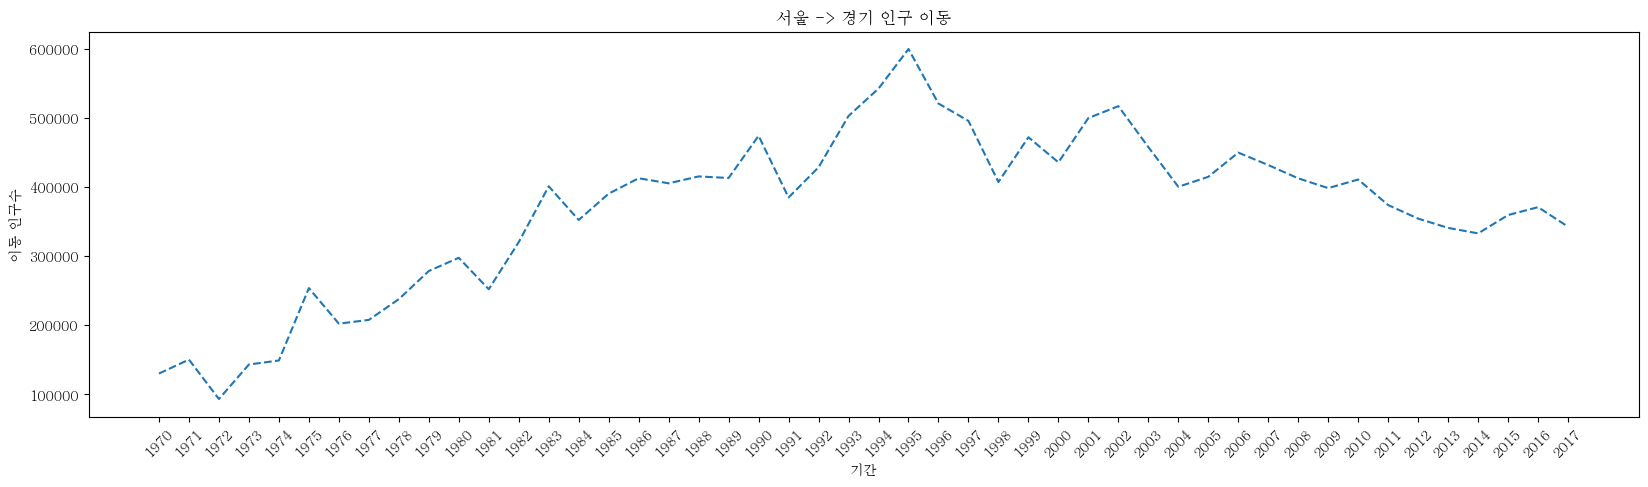

In [10]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')
df
# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.ffill()

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul = df_seoul.rename({'전입지별':'전입지'}, axis=1)
df_seoul = df_seoul.set_index('전입지')

# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']

# x, y축 데이터를 plot 함수에 입력
plt.figure(figsize=(20,5))
plt.xticks(rotation = 45)
plt.plot(sr_one.index, sr_one.values, linestyle="--")
# plt.plot(sr_one.values, sr_one.index, linestyle="--")  #상기 X,Y 위치 변경





# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()  # 변경사항 저장하고 그래프 출력